**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import  DecisionTreeRegressor
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

**Create Dataframe**

In [42]:
df = pd.read_csv(r'train.csv')
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


**Data Cleaning - Check Null Values**

In [43]:
df.isnull().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

**CheckCorrelation**



In [44]:
correlation_matrix =df.corr()

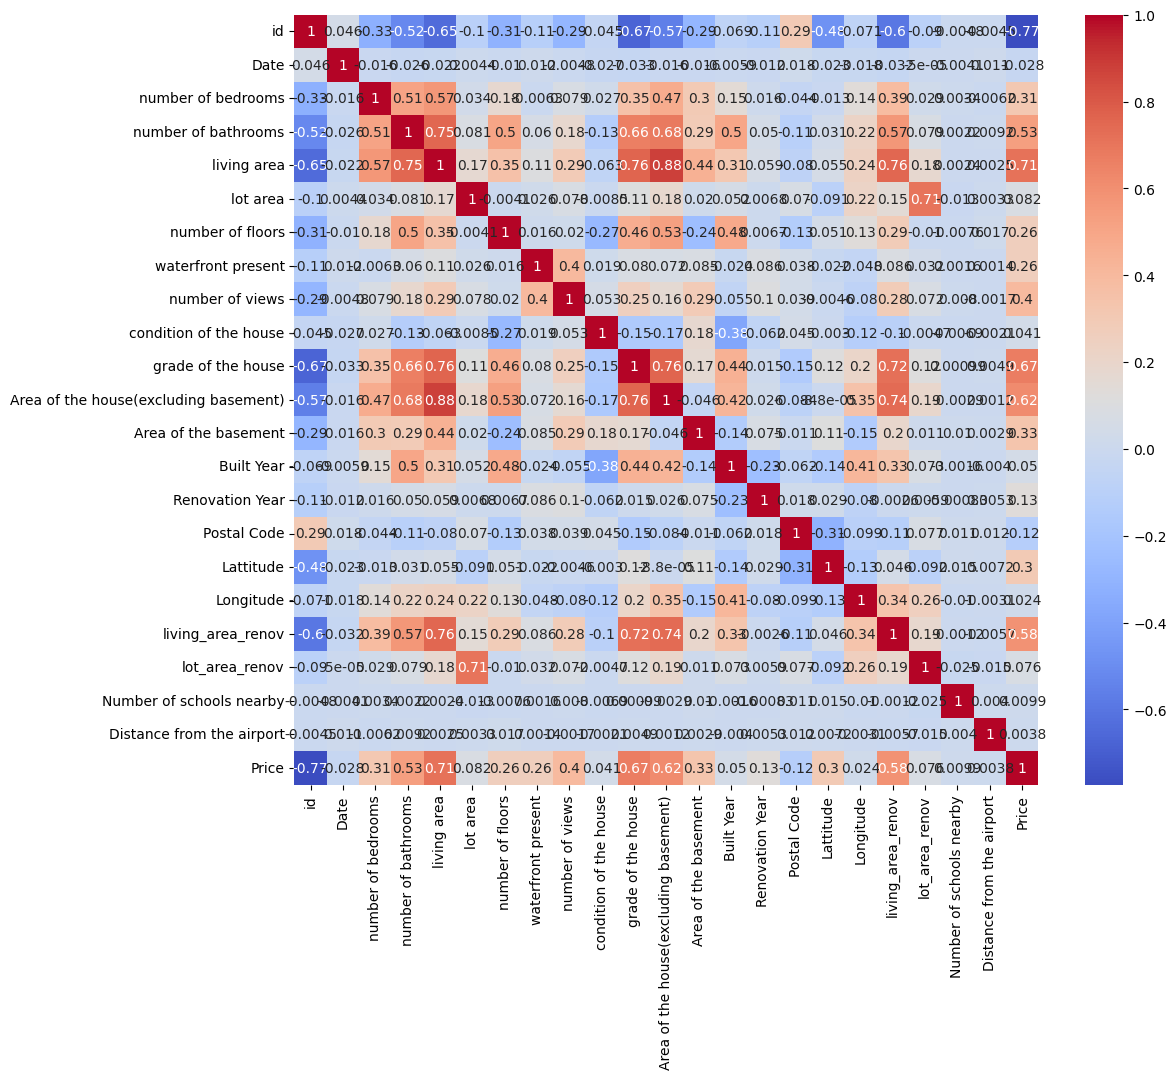

In [45]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [46]:
df.shape

(14620, 23)

In [47]:
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,...,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,6.762821e+09,42604.538646,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,...,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,6.237575e+03,67.347991,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,...,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


**Preprocess Data** - Split Data

In [48]:
X = df.drop(['Price', 'id', 'Date','Postal Code'], axis = 1)
X

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport
0,5,2.50,3650,9050,2.0,0,4,5,10,3370,280,1921,0,52.8645,-114.557,2880,5400,2,58
1,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,52.8878,-114.470,2470,4000,2,51
2,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,52.8852,-114.468,2940,6600,1,53
3,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,52.9532,-114.321,3350,42847,3,76
4,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,52.9047,-114.485,2060,4500,1,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,2,1.50,1556,20000,1.0,0,0,4,7,1556,0,1957,0,52.6191,-114.472,2250,17286,3,76
14616,3,2.00,1680,7000,1.5,0,0,4,7,1680,0,1968,0,52.5075,-114.393,1540,7480,3,59
14617,2,1.00,1070,6120,1.0,0,0,3,6,1070,0,1962,0,52.7289,-114.507,1130,6120,2,64
14618,4,1.00,1030,6621,1.0,0,0,4,6,1030,0,1955,0,52.7157,-114.411,1420,6631,3,54


In [49]:
y = df['Price']
y

0        2380000
1        1400000
2        1200000
3         838000
4         805000
          ...   
14615     221700
14616     219200
14617     209000
14618     205000
14619     146000
Name: Price, Length: 14620, dtype: int64

**Encoding**

In [50]:
custom_year = 2023
df['Age'] = custom_year - df['Built Year']
df['Built Year'] = df['Age']
df.drop('Age', axis=1, inplace=True)

custom_year = 2023
df['Age'] = custom_year - df['Renovation Year']
df['Renovation Year'] = df['Age']
df.drop('Age', axis=1, inplace=True)


**Scalling**

In [51]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

**Data Visualisation**

Distribution of Target Variable (Price):

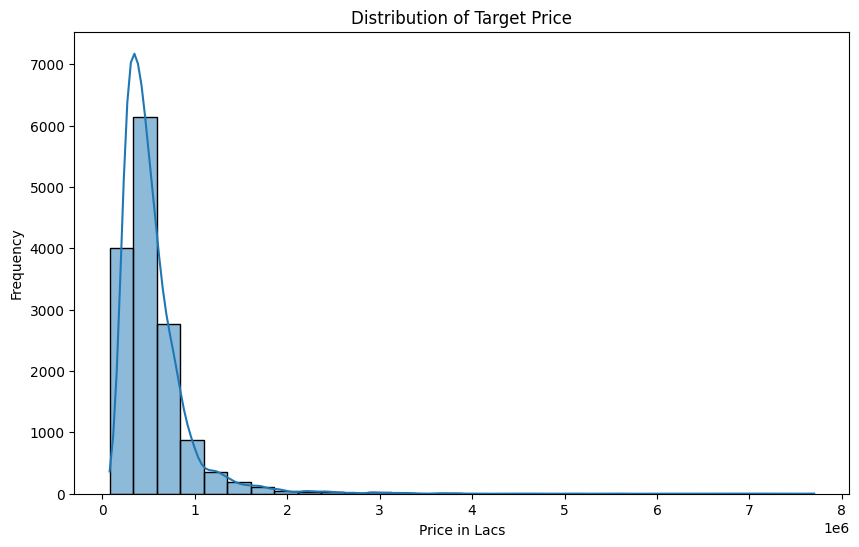

In [52]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Target Price')
plt.xlabel('Price ')
plt.ylabel('Frequency')
plt.show()


**Correlation Heatmap:**

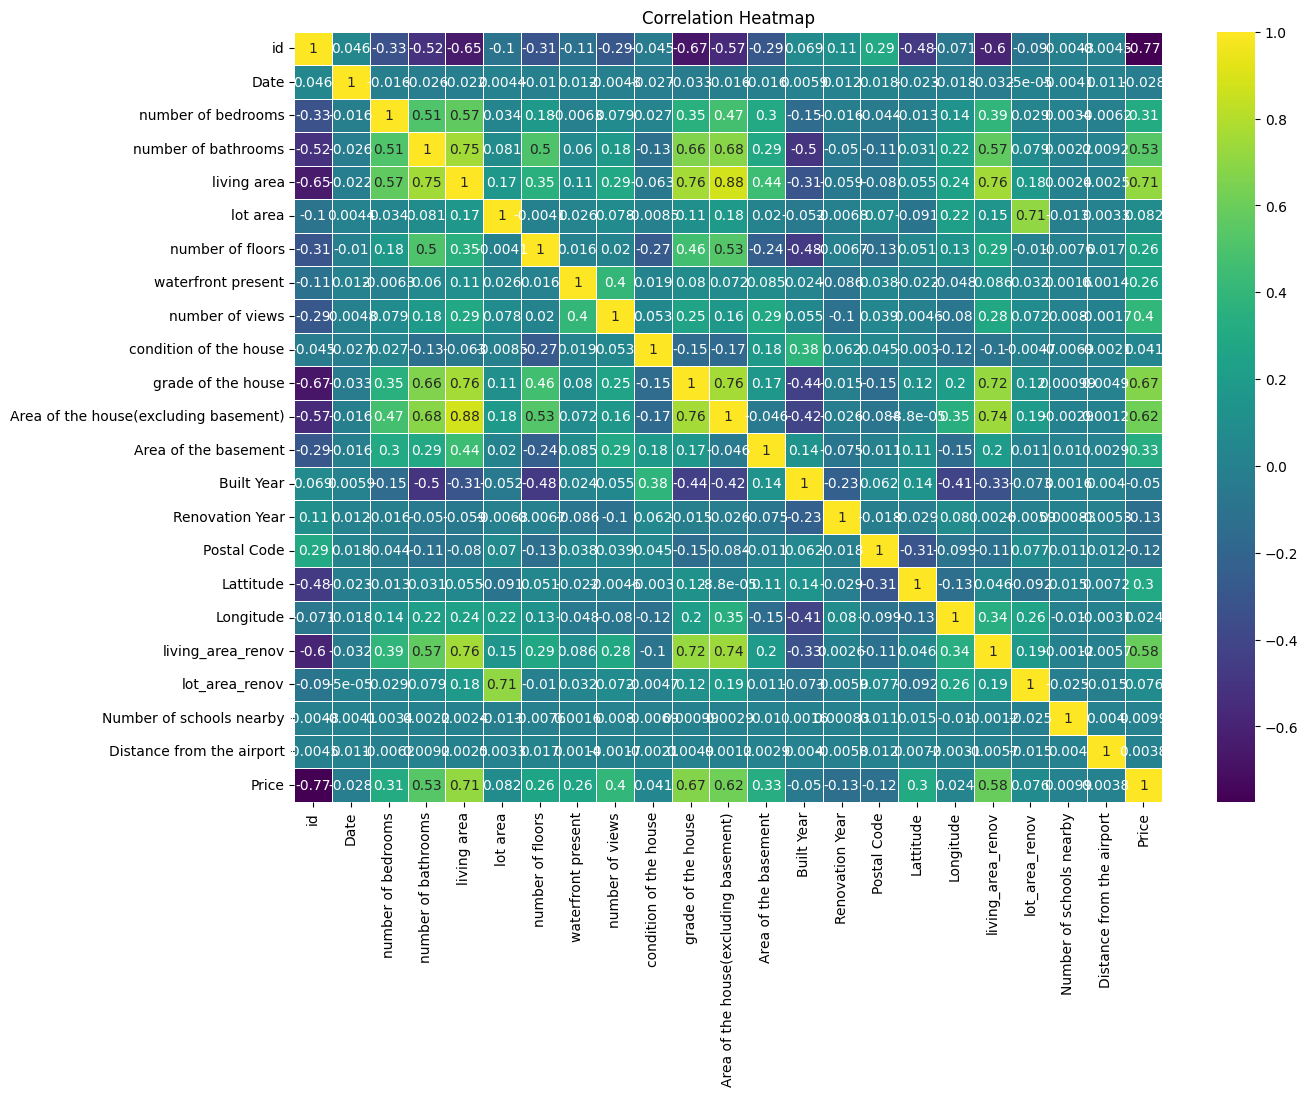

In [53]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='viridis', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


**Boxplots for Categorical Variables: POSTED_BY and BHK_OR_RK**

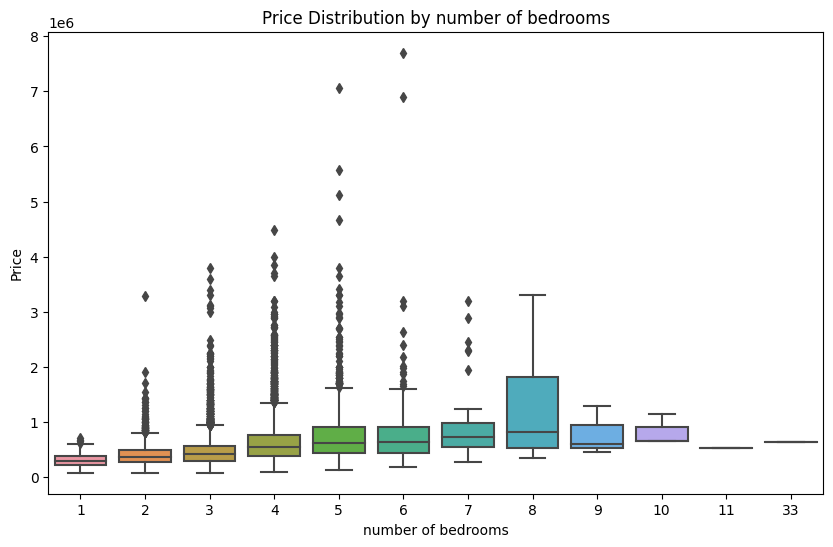

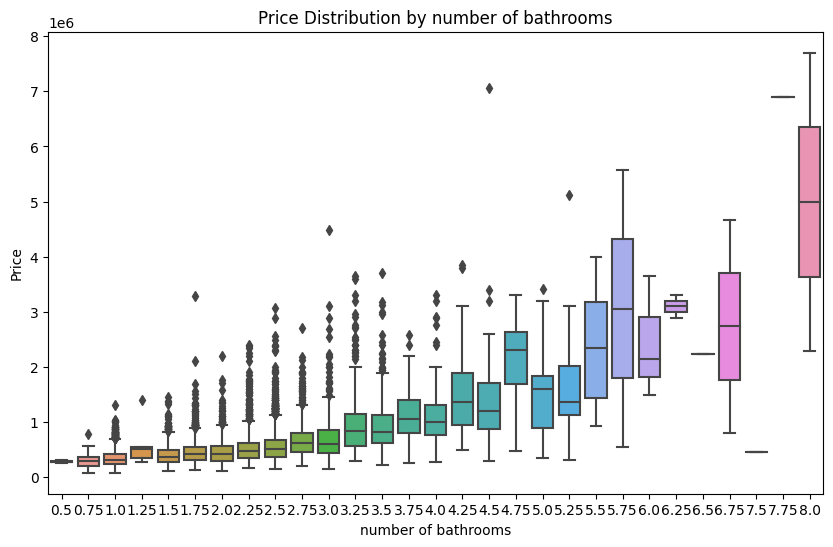

In [54]:
plt.figure(figsize=(10,6))
sns.boxplot(x='number of bedrooms', y='Price', data=df)
plt.title('Price Distribution by number of bedrooms')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='number of bathrooms', y='Price', data=df)
plt.title('Price Distribution by number of bathrooms')
plt.show()


**Count of Categories**

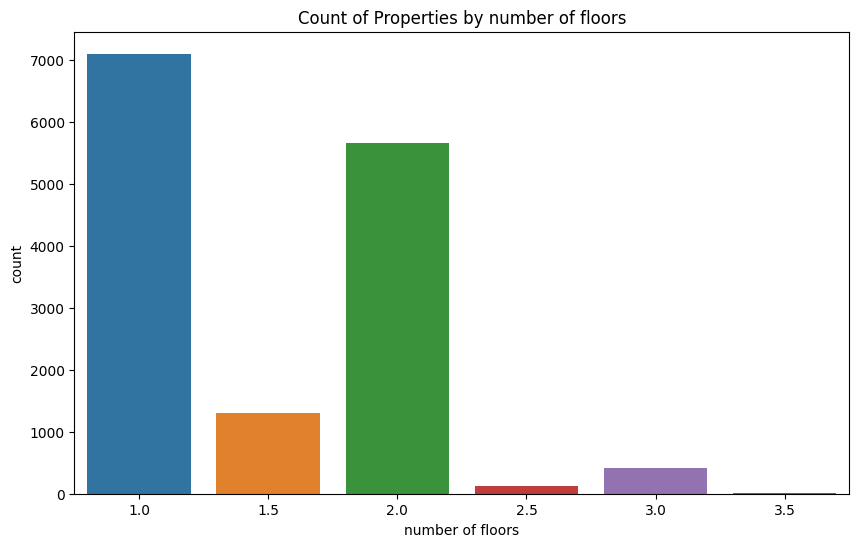

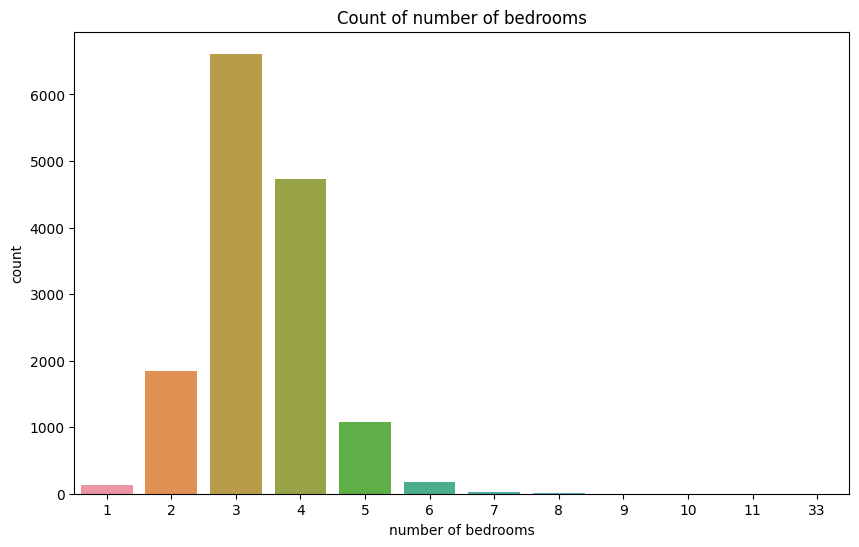

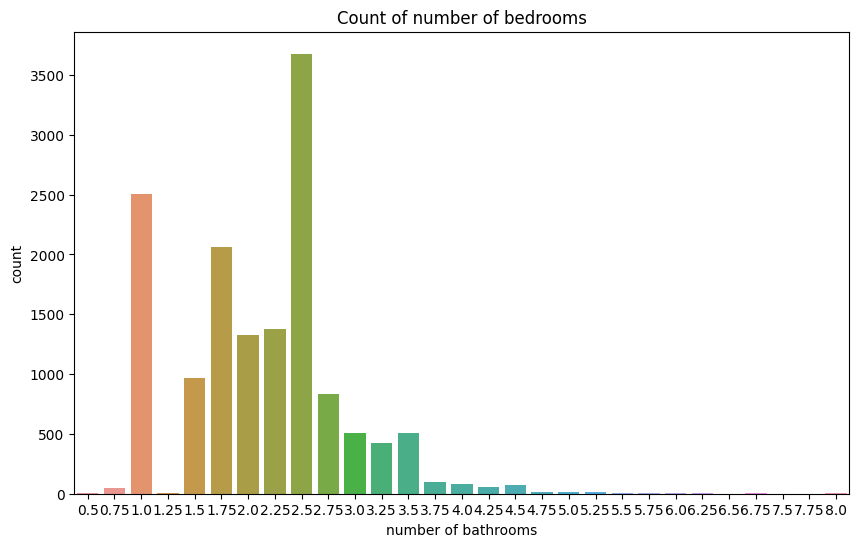

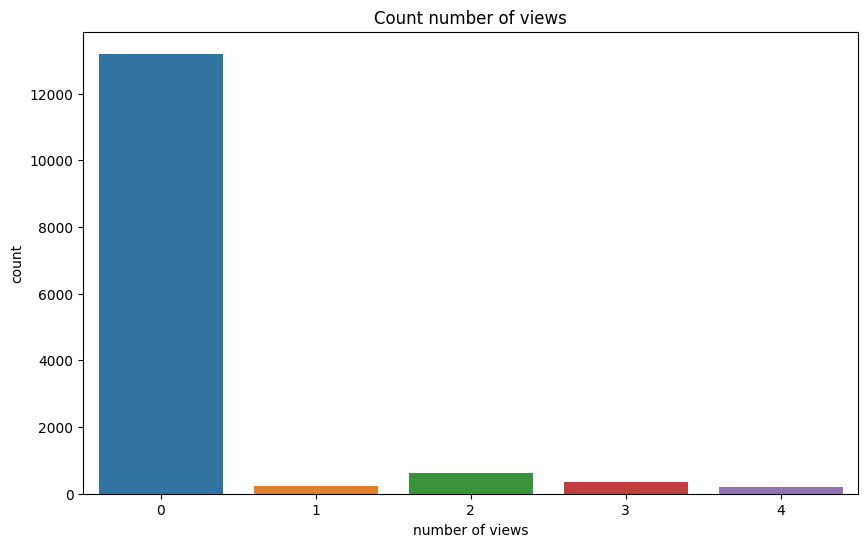

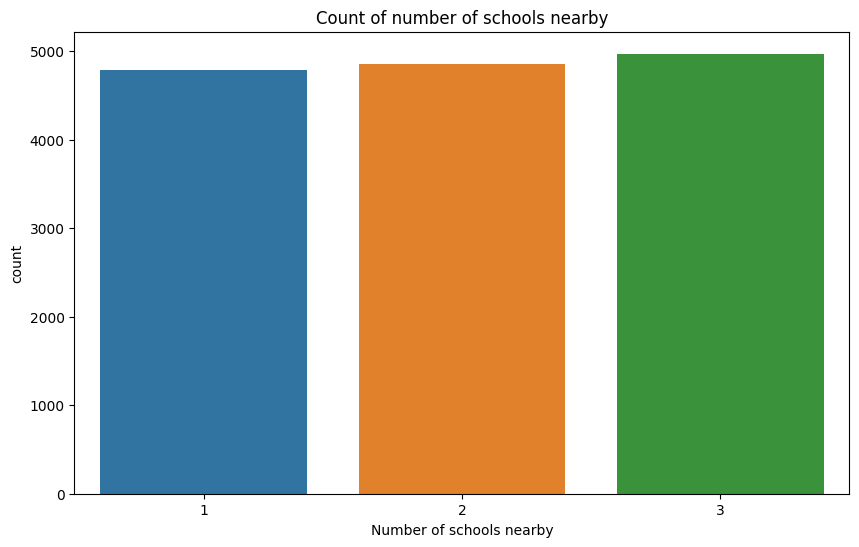

In [84]:
plt.figure(figsize=(10,6))
sns.countplot(x='number of floors', data=df)
plt.title('Count of Properties by number of floors')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='number of bedrooms', data=df)
plt.title('Count of number of bedrooms')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='number of bathrooms', data=df)
plt.title('Count of number of bedrooms')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='number of views', data=df)
plt.title('Count number of views')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='Number of schools nearby', data=df)
plt.title('Count of number of schools nearby')
plt.show()


**Distribution of Continuous Variables: SQUARE_FT, LONGITUDE, LATITUDE**

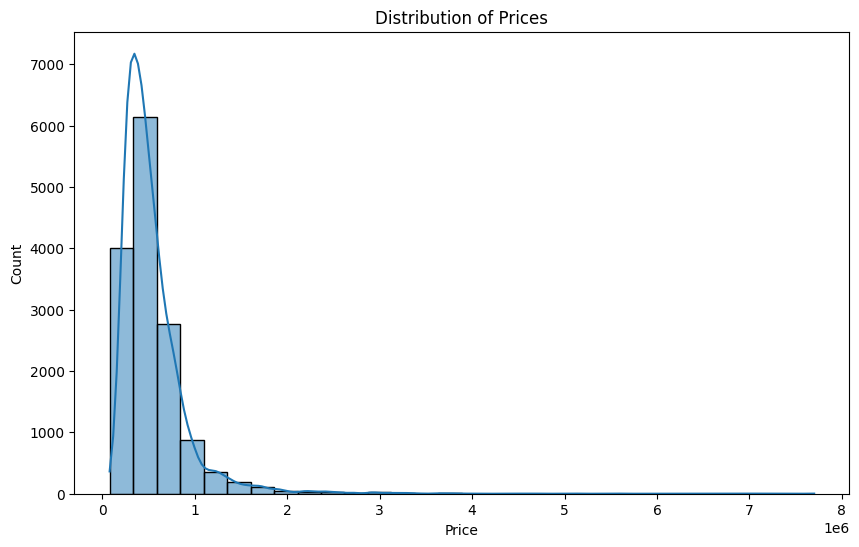

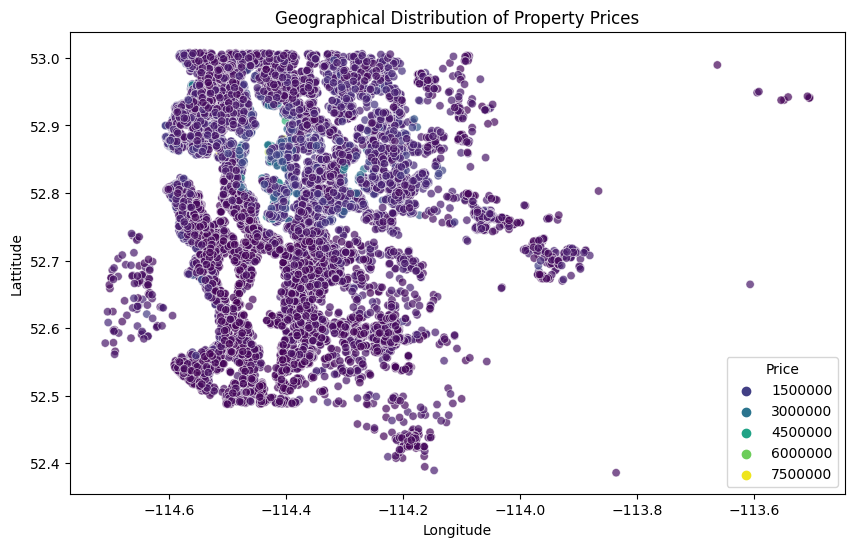

In [85]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='Longitude', y='Lattitude', hue='Price', data=df, palette='viridis', alpha=0.7)
plt.title('Geographical Distribution of Property Prices')
plt.show()


**Price vs. Number of Bedrooms (BHK_NO)**

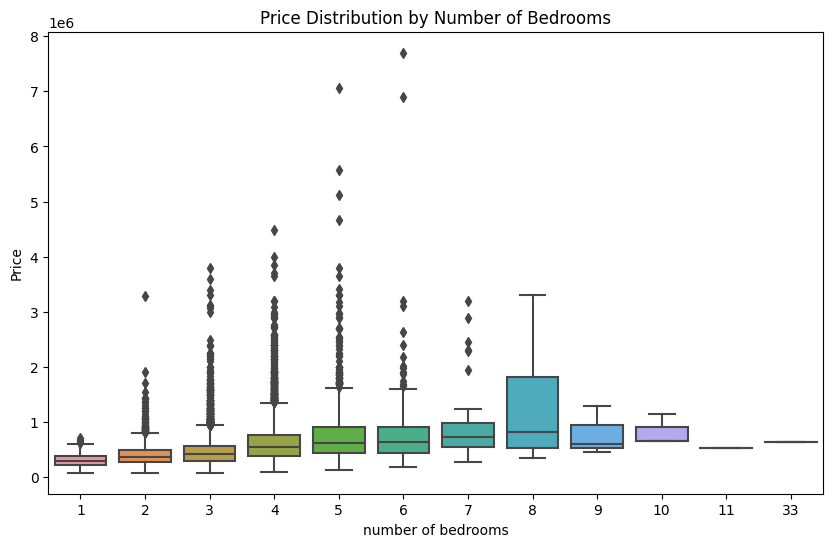

In [58]:
plt.figure(figsize=(10,6))
sns.boxplot(x='number of bedrooms', y='Price', data=df)
plt.title('Price Distribution by Number of Bedrooms')
plt.show()


**Split data for tarining**

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.3, random_state=1)


**Define hyperparameters to tune and their possible values**

In [80]:

param_grid = {
    'alpha': [ 1e-4, 1e-3, 1e-2, 1e-1, 1e0], # Regularization term
    'max_iter': [5000],  # Maximum number of iterations
    'learning_rate': ['invscaling'],
    'eta0': [0.01] # Initial learning rate
}

**Create the model**

In [81]:
sgd_model = SGDRegressor()

grid_search = GridSearchCV(sgd_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_sgd_model = grid_search.best_estimator_

**Make Prediction**

In [82]:
# Score the model on train data
train_score = best_sgd_model.score(X_train, y_train)
print(f"Training Score: {train_score}")

# Score the model on test data
test_score = best_sgd_model.score(X_test, y_test)
print(f"Test Score: {test_score}")

Training Score: 0.6923556921081804
Test Score: 0.6915386118593064


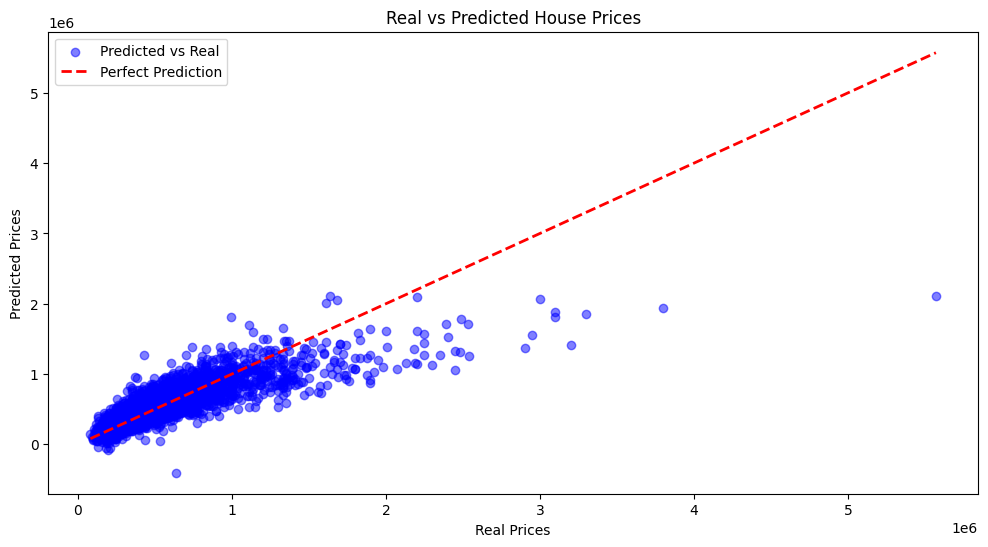

In [83]:

# Predict values using the encoded and scaled test set from the training data
y_pred = best_sgd_model.predict(X_test)  # Ensure X_test has undergone the same preprocessing

plt.figure(figsize=(12, 6))

# Actual vs. Predicted scatter plot
plt.scatter(y_test, y_pred, alpha=0.5, c='blue', label='Predicted vs Real')

# For comparison: Perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Perfect Prediction')

plt.xlabel("Real Prices")
plt.ylabel("Predicted Prices")
plt.title("Real vs Predicted House Prices")
plt.legend(loc='upper left')

plt.show()

